In [177]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [178]:
data = pd.read_csv('diamonds.csv')

In [179]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()
#cut, color and clarity seem like categorical attributes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [180]:
data.info()
#from observation we can see that there are no empty attributes
#hence we won't have to worry about the working strategies to tackle them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [181]:
data["cut"].value_counts()
#cut indeed is categorical

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [182]:
data["color"].value_counts()
#color is also categorical

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [183]:
data["clarity"].value_counts()
#clarity is also categorical

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [184]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [185]:
cond = data["z"]!=0.0
data = data[cond]

In [186]:
data["size"] = (data['x'])*(data['y'])*(data['z'])
data["depth_by_z"] = data['depth']/data['z']
data["table_times_y"] = data["table"]*data['y']
corr = data.corr()
print(corr["price"])
#there is definitely a high correlation between the price of the diamond and the carat 
#attribute and the size of the diamond
#depth_by_z also showing very promissing correlation 
#another interesting and very strong correlation is shown by table_times_y 
data.info()

carat            0.921592
depth           -0.010729
table            0.127245
price            1.000000
x                0.887231
y                0.867864
z                0.868206
size             0.904255
depth_by_z      -0.819081
table_times_y    0.847582
Name: price, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 13 columns):
carat            53920 non-null float64
cut              53920 non-null object
color            53920 non-null object
clarity          53920 non-null object
depth            53920 non-null float64
table            53920 non-null float64
price            53920 non-null int64
x                53920 non-null float64
y                53920 non-null float64
z                53920 non-null float64
size             53920 non-null float64
depth_by_z       53920 non-null float64
table_times_y    53920 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 5.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213A7932518>,
      dtype=object)

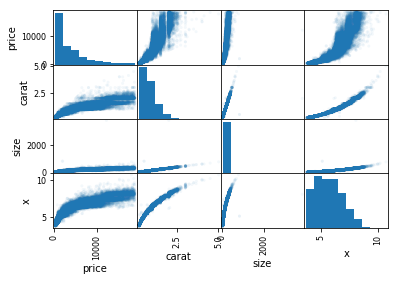

In [213]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['price','carat','size', 'x']], alpha=0.05)

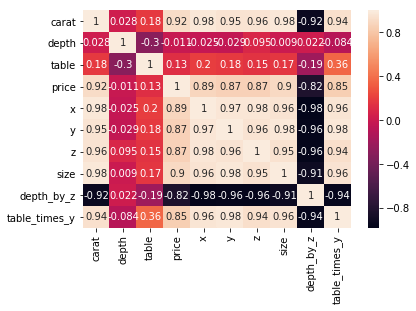

In [188]:
import seaborn as sns

sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           annot=True
           ) 

In [189]:
map_categorical = {
                    "cut" : {'Fair': -2, 'Good': -1, 'Very Good':0, 'Premium':1, 'Ideal':2},
                    "clarity" : {'I1': -3, 'SI2': -2, 'SI1':-1, 'VS2':0, 'VS1':1, 'VVS2':2, 'VVS1':3, 'IF':4},
                    "color": {'D':3,'E':2,'F':1,'G':0,'H':-1,'I':-2,'J':-3}
                  }

data.replace(map_categorical, inplace=True) 

In [190]:
data = data.sample(frac=1)
X = data.drop(["price","depth","table"], axis = 1)
y = data["price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

In [191]:
X_train.head(3)

,carat,cut,color,clarity,x,y,z,size,depth_by_z,table_times_y
23061,1.61,2,2,-2,7.45,7.42,4.68,258.70572,13.461538,445.20
176,0.74,0,1,0,5.80,5.84,3.57,120.92304,17.170868,356.24
45762,0.51,0,1,1,5.16,5.10,3.13,82.36908,19.488818,300.90


In [192]:
y_train.head(3)

23061    11090
176       2775
45762     1706
Name: price, dtype: int64

In [193]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'size', 'depth_by_z',
       'table_times_y'],
      dtype='object')

In [194]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37744 entries, 23061 to 33889
Data columns (total 10 columns):
carat            37744 non-null float64
cut              37744 non-null int64
color            37744 non-null int64
clarity          37744 non-null int64
x                37744 non-null float64
y                37744 non-null float64
z                37744 non-null float64
size             37744 non-null float64
depth_by_z       37744 non-null float64
table_times_y    37744 non-null float64
dtypes: float64(7), int64(3)
memory usage: 3.2 MB


# Transformation Pipelines

In [195]:
from sklearn.base import BaseEstimator, TransformerMixin

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    



#class map_cut():
#    def __init__(self, cut):
#        self.cut = cut
#    def fit(self, X, y=None):
#        return self
#    def transform(self,X):
#        X[self.cut] = X[self.cut].map({'Fair': -2, 'Good': -1, 'Very Good':0, 'Premium':1, 'Ideal':2})
#        return X[self.cut]
    
#class map_clarity():
#    def __init__(self,clarity):
#        self.clarity = clarity
#    def fit(self, X, y=None):
#        return self
#    def transform(self,X):
#        X[self.clarity] = X[self.clarity].map({'I1': -3, 'SI2': -2, 'SI1':-1, 'VS2':0, 'VS1':1, 'VVS2':2, 'VVS1':3, 'IF':4})
#        return X[self.clarity]
    
#class map_color():
#    def __init__(self,color):
#        self.color = color
#    def fit(self, X, y=None):
#        return self

#    def transform(self,X):
#        X[self.color] = X[self.color].map({'D':3,'E':2,'F':1,'G':0,'H':-1,'I':-2,'J':-3})
#        return X[self.color] 

In [197]:
num_attributes = list(X_train)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer 

num_pipeline = Pipeline([
    ('selector', DFSelector(num_attributes)),
    ('scaler', StandardScaler())
])

#cut_pipeline = Pipeline([
#    ('selector', DFSelector(['cut'])),
#    ('map_cut', DictVectorizer(sparse=False).fit([cut_map]))
#])

#clarity_pipeline = Pipeline([
#    ('selector',DFSelector(['clarity'])),
#    ('map_clarity', DictVectorizer(sparse = False).fit([clarity_map])),
#])

#color_pipeline = Pipeline([
#    ('selector', DFSelector(['color'])),
#    ('map_color', DictVectorizer(sparse = False).fit([color_map])),
#]) 

In [198]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("cut_pipeline", cut_pipeline)
    #("clarity_pipeline", clarity_pipeline),
    #("color_pipeline", color_pipeline)
])


In [214]:
X_train_prepared = num_pipeline.fit_transform(X_train,y_train)
X_test_prepared = num_pipeline.fit_transform(X_test,y_test)
X_train_prepared

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


array([[ 1.7155858 ,  0.98102889,  0.93696053, ...,  1.68759709,
        -1.3457179 ,  1.70448917],
       [-0.11969731, -0.81057408,  0.34914679, ..., -0.11416568,
        -0.27187871,  0.39010037],
       [-0.6048871 , -0.81057408,  0.34914679, ..., -0.61832985,
         0.39916031, -0.42755111],
       ...,
       [ 0.51315894,  0.0852274 ,  1.52477427, ...,  0.51789788,
        -0.79177688,  0.67969143],
       [-1.17445772, -0.81057408,  0.93696053, ..., -1.18447533,
         2.12621945, -1.78803808],
       [-1.04788647,  0.98102889,  0.93696053, ..., -1.05417105,
         1.47923793, -1.2604209 ]])

# Helper Functions 

In [200]:
def percent_data_with_given_accuracy(diff, val):
    percent_arr = (abs(diff["Predicted"]-diff["Actual"])/diff["Actual"])*100
    per = 0
    for x in percent_arr:
        if(x<=val):
            per = per+1
    return (per/len(percent_arr))*100

In [201]:
def draw_predictions_actual(test_arr, pred_arr):
    t = np.linspace(0,18500,1000)
    leng = len(pred_arr)
    plt.plot(t,t,c='red')
    plt.scatter(test_arr, pred_arr, alpha=0.05, c='blue')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.ylim(0,20000)
    plt.xlim(0,20000)
    plt.show()
    

In [202]:
from sklearn.model_selection import cross_val_score
import numpy as np

def get_cross_val_score(model, x, y, folds, scoring_type):
    scores = cross_val_score(model, x, y, cv=folds, scoring = scoring_type)
    val = np.sqrt(-scores)
    print('The root mean square error scores: ', val)
    print('\nThe mean of the rmse error is: ', val.mean())
    print('\nThe standard deviation of the rmse eroor is: ', val.std())

# Linear Regression

In [203]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_prepared, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [204]:
get_cross_val_score(model_lr, X_train_prepared, y_train, 10,"neg_mean_squared_error")

The root mean square error scores:  [1096.28490307 1146.24417105 1179.83692558 1345.03265116 1108.71452299
 1138.84414715 1220.14886386 1181.32612913 1253.89702349 1171.04703845]

The mean of the rmse error is:  1184.1376375940279

The standard deviation of the rmse eroor is:  70.10157949790246


The root mean square error scores:  [1293.12367118 1156.0214082  1180.10705923 1147.97198298 1178.06716698
 1515.62909378 1144.05363361 1234.72450449 2180.37212082 1467.46859954]

The mean of the rmse error is:  1349.7539240798922

The standard deviation of the rmse eroor is:  304.39348033377985


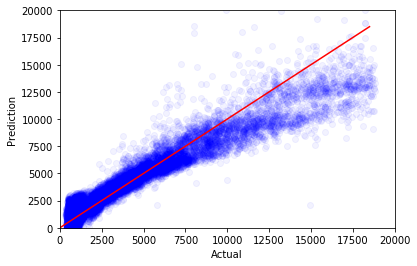

In [216]:
pred_lr_test = model_lr.predict(X_test_prepared)

get_cross_val_score(model_lr, X_test_prepared, y_test, 10,"neg_mean_squared_error")

draw_predictions_actual(y_test.values, pred_lr_test)
plt.show()

[2.94237457e-12 9.94169253e-12 2.86920494e-12 7.89646515e-12
 6.35606497e-12 5.26530020e-12 3.57794013e-12 1.93697914e-12
 5.80975507e-12 6.09900318e-12]
5.269477989236909e-12


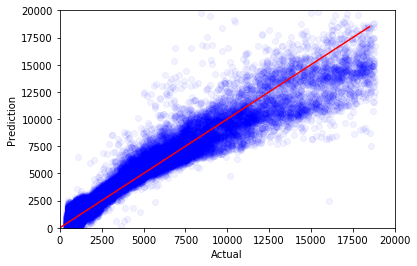

In [206]:
pred_lr_train = model_lr.predict(X_train_prepared)

import numpy as np

scores_lr = cross_val_score(model_lr, X_train_prepared, pred_lr_train, cv=10, scoring="neg_mean_squared_error")
print(np.sqrt(-scores_lr))

print(np.sqrt(-scores_lr).mean())

draw_predictions_actual(y_train.values, pred_lr_train)
plt.show() 

In [208]:
temp_df = pd.DataFrame({'Actual':y_test.values, 'Predicted': pred_lr_test})
temp_df.head(10) 

,Actual,Predicted
0,4252,4696.317263
1,2313,2360.744458
2,525,929.076351
3,907,1536.710358
4,4397,4521.719748
5,2889,3548.747070
6,5302,5442.163628
7,600,1546.669447
8,1845,2291.499077
9,3713,3579.366806


# SGD Regressor

In [209]:
from sklearn.linear_model import SGDRegressor

model_sgd = SGDRegressor(random_state=42)
model_sgd.fit(X_train_prepared, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [210]:
get_cross_val_score(model_sgd, X_train_prepared, y_train, 5,"neg_mean_squared_error")

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=No

The root mean square error scores:  [1138.69230227 1283.80306066 1135.449545   1203.70604526 1217.76997173]

The mean of the rmse error is:  1195.8841849829755

The standard deviation of the rmse eroor is:  55.12377893214942


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [218]:
get_cross_val_score(model_sgd, X_test_prepared, y_test, 5,"neg_mean_squared_error") 

The root mean square error scores:  [1639.14649171 1171.94606863 1216.5777743  1199.73750149 1718.3969116 ]

The mean of the rmse error is:  1389.160949544282

The standard deviation of the rmse eroor is:  238.21737533097132


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=No

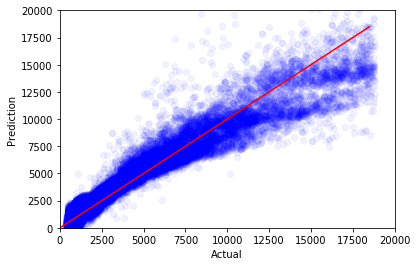

In [211]:
pred_sgd_train = model_sgd.predict(X_train_prepared)

draw_predictions_actual(y_train.values, pred_sgd_train)
plt.show() 

In [212]:
random_data  = X_train_prepared[0:10,:]
random_label = y_train.iloc[:10]

print('Predictions', model_sgd.predict(random_data))
print('\nActual', list(random_label))

Predictions [10700.9656595   3225.78632333  1742.75337522  1874.8560939
  -341.40020906  1877.91470684   113.27334817   700.18110573
   595.10029256  4186.78735343]

Actual [11090, 2775, 1706, 1752, 530, 1728, 500, 599, 829, 3124]


# Polynomial Regressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = 

# SVM

In [225]:
from sklearn.svm import SVR
from sklearn import svm

model_svm = SVR()
model_svm.fit(X_train_prepared, y_train)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [222]:
get_cross_val_score(model_svm, X_train_prepared, y_train, 5,"neg_mean_squared_error")

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

The root mean square error scores:  [2694.40456233 2793.70547007 2656.60933865 2781.96270493 2835.00729629]

The mean of the rmse error is:  2752.3378744553925

The standard deviation of the rmse eroor is:  66.24705740597796


In [ ]:
from sklearn.model_selection import GridSearchCV

params_svm = {'C':[0.5,1,3], 'degree':[2,3], 'epsilon':[0.1,0.2] }
svc = svm.SVR()
hyper_model_svm = GridSearchCV(svc, params_svm, cv=5)
hyper_model_svm.fit(X_train_prepared, y_train) 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

# Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()
model_forest.fit(X_train_prepared, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [139]:
y_pred = model_forest.predict
scores_forest = cross_val_score(model_forest, X_train_prepared, y_train, cv=10, scoring="neg_mean_squared_error") 
np.sqrt(-scores).mean()

1187.2179876745554

# Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = reg_tree.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.064213484903108

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg_tree, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)

In [22]:
np.sqrt(-scores).mean()

750.1625136424657

In [23]:
np.sqrt(-scores).std()

16.295899668921496

In [24]:
data["price"].mean()

3932.799721913237

In [34]:
X_test_prepared = full_pipeline.fit_transform(X_test,y_test)
pred_tree = reg_tree.predict(X_test_prepared) 

In [36]:
diff = pd.DataFrame(data = pred_tree)
diff.columns = ['Predicted']
diff["Actual"] = y_test.values

In [37]:
diff.head(5) 

,Predicted
0,17713.0
1,5055.0
2,720.0
3,4189.0
4,11255.0


In [57]:
percent_data_with_given_accuracy(diff,20)
#the predicted and actual values differ by apprx 9.42%
#this looks pretty bad, only 43% of the predictions had an error of less than 5%
#we will try some other regressor to tackle this issue

80.18786305771846

In [40]:
pred_tree

array([17713.,  5055.,   720., ...,  3162.,  5420.,  1862.])

In [31]:
y_test.values

array([16304,  6303,   743, ...,  3435,  6037,  2576], dtype=int64)

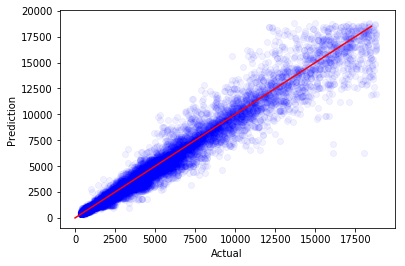

In [41]:
draw_predictions_actual(y_test.values, pred_tree)
plt.show()

# SVM Regressor

In [42]:
#now we will try the SVC Regressor
from sklearn import svm

clf = svm.SVR(kernel='linear')
clf.fit(X_train_prepared, y_train.values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
clf.score(X_test_prepared, y_test.values)
#svm gave accuracy of ~85% on test dataset

0.8408660754491666

In [44]:
pred_svm = clf.predict(X_test_prepared) 

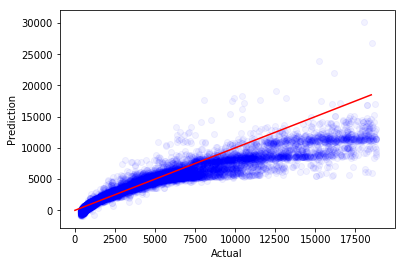

In [45]:
draw_predictions_actual(y_test.values, pred_svm)
plt.show()

In [47]:
diff_svm = pd.DataFrame(data = pred_svm)
diff_svm.columns = ['Predicted']

diff_svm["Actual"] = y_test.values
percent_diff_svm = ((abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100).mean()
percent_arr = (abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_svm)

percent predictions with less than 5% deviation from actual value=  17.28463725126684
percent predictions with less than 10% deviation from actual value=  32.795698924731184
percent error on average=  24.537247848821544


In [48]:
scores = cross_val_score(clf, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
np.sqrt(-scores).std()

1510.1995147035686


44.17761599696236

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

regr_linear = LinearRegression()
regr_linear.fit(X_train_prepared, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
regr_linear.score(X_train_prepared,y_train)
#the score is more promising than SVM

0.9212302211240244

In [51]:
pred_lr = regr_linear.predict(X_test_prepared) 

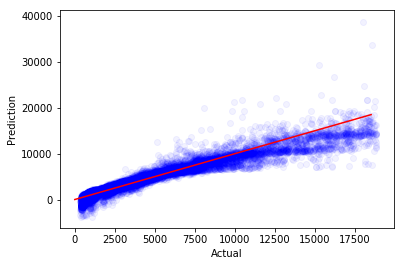

In [52]:
draw_predictions_actual(y_test.values, pred_lr)
plt.show() 

In [ ]:
diff_lr = pd.DataFrame(data = pred_lr)
diff_lr.columns = ['Predicted']

diff_lr["Actual"] = y_test.values
percent_diff_lr = ((abs(diff_lr["Predicted"]-diff_lr["Actual"])/diff_lr["Actual"])*100).mean()
percent_arr = (abs(diff_lr["Predicted"]-diff_lr["Actual"])/diff_lr["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_lr)

In [ ]:
diff

In [ ]:
scores = cross_val_score(regr_linear, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
np.sqrt(-scores).std()

In [122]:
#polynomial regressor
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_prepared)
X_train_prepared[0].shape


(26,)

In [124]:
X_poly_train[0].shape

(377,)